In [2]:
#Import Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import nltk
from nltk.tokenize import word_tokenize
import seaborn as sns
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
train_d = pd.read_csv('/kaggle/input/spam-dataset/spam.csv',encoding = 'latin1')

In [4]:
train_d.info()
train_d

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [5]:
df_train = train_d.rename({'v1': 'Target', 'v2': 'Texts'}, axis =1)

In [6]:
df_train

,Target,Texts,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [7]:
df_train = df_train.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)
df_train.head()

,Target,Texts
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
df_train.Target.value_counts()

Target
ham     4825
spam     747
Name: count, dtype: int64

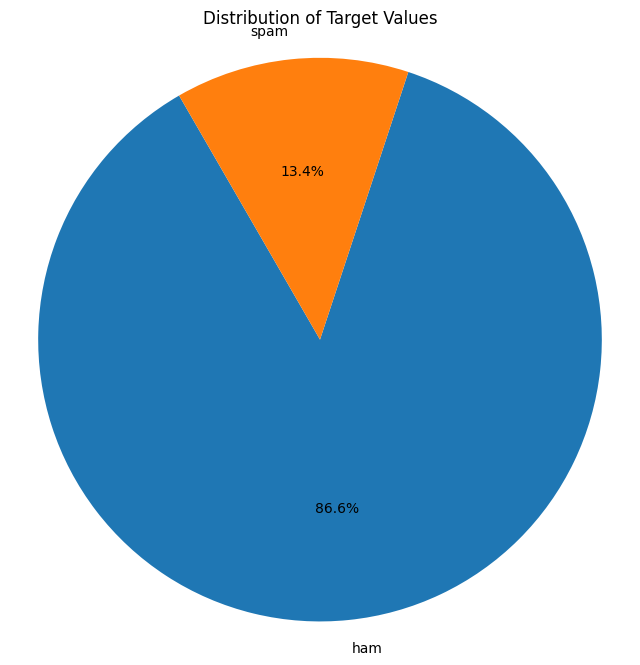

In [9]:
#Making Pie chart
value_count = df_train.Target.value_counts()


plt.figure(figsize=(8, 8))
plt.pie(value_count, labels=value_count.index, autopct='%1.1f%%', startangle=120)
plt.title('Distribution of Target Values')
plt.axis('Equal')
plt.show()

In [10]:
def Lab_enc(col):
    labelencoder = LabelEncoder()
    col = labelencoder.fit_transform(col)
    return col
df_train['Target'] = Lab_enc(df_train.Target)
df_train.head(5)

,Target,Texts
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
df_train.duplicated().sum()

403

In [12]:
df_train = df_train.drop_duplicates(keep = 'first')
df_train.duplicated().sum()

0

In [13]:
nltk.download('punkt')
nltk.download('stopwords')

def prep_texts(texts):
    # Lowercasing
    texts = texts.lower()
    
    # Tokenization
    tokens = word_tokenize(texts)
    
    # Removing punctuation
    tokens = [words for words in tokens if words not in string.punctuation]
    
    # Removing stop words
    stop_words = set(stopwords.words('english'))
    tokens = [words for words in tokens if words not in stop_words]
    
    # Stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(words) for words in tokens]
    
    # Join the tokens back into a single string
    preprocessed_text = ' '.join(tokens)
    
    return preprocessed_text

preprocessed_texts = df_train.Texts.apply(prep_texts)
print(preprocessed_texts)

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
0       go jurong point crazy.. avail bugi n great wor...
1                           ok lar ... joke wif u oni ...
2       free entri 2 wkli comp win fa cup final tkt 21...
3             u dun say earli hor ... u c alreadi say ...
4                nah n't think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u. u å£750 pound prize ...
5568                             ì_ b go esplanad fr home
5569                                piti mood ... suggest
5570    guy bitch act like 'd interest buy someth els ...
5571                                       rofl true name
Name: Texts, Length: 5169, dtype: object


In [14]:
preprocessed_texts

0       go jurong point crazy.. avail bugi n great wor...
1                           ok lar ... joke wif u oni ...
2       free entri 2 wkli comp win fa cup final tkt 21...
3             u dun say earli hor ... u c alreadi say ...
4                nah n't think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u. u å£750 pound prize ...
5568                             ì_ b go esplanad fr home
5569                                piti mood ... suggest
5570    guy bitch act like 'd interest buy someth els ...
5571                                       rofl true name
Name: Texts, Length: 5169, dtype: object

In [15]:
# Transforms the preprocessed text into TF-IDF vectors
from sklearn.feature_extraction.text import TfidfVectorizer

tfidfs_vectorizer = TfidfVectorizer()

tfidfs_vectorizer.fit(preprocessed_texts)

tfidf_vec = tfidfs_vectorizer.transform(preprocessed_texts)
tfidf_vec


<5169x7464 sparse matrix of type '<class 'numpy.float64'>'
	with 43814 stored elements in Compressed Sparse Row format>

In [19]:
import spacy

# Load the pre-trained SpaCy model with word vectors
nlp = spacy.load("en_core_web_md")

# Function to convert text to word embeddings
def text2word_emb(texts):
    docs = nlp(texts)
    word_embeddings = [token.vector for token in docs]
    return word_embeddings

embedded_word = preprocessed_texts.apply(text2word_emb)
print(embedded_word)


0       [[1.484, 8.3944, -8.3806, 3.2081, -4.2582, 1.9...
1       [[2.5771, 0.56807, -1.2813, -2.0137, -4.0443, ...
2       [[1.8048, -4.7185, 0.41772, -2.5863, 2.1238, -...
3       [[-2.5813, 6.7737, 1.6951, -3.5353, -5.5316, 2...
4       [[3.5059, 2.9413, -0.30366, -0.53069, -3.0985,...
                              ...                        
5567    [[-3.3606, -4.8288, 3.7581, 4.7422, 2.5184, -0...
5568    [[3.9326, 8.3131, -2.0574, -6.794, -0.094687, ...
5569    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
5570    [[-2.8385, 1.3638, -2.7843, -0.61173, -5.9512,...
5571    [[1.0976, -1.948, -0.83027, -2.0837, -0.47292,...
Name: Texts, Length: 5169, dtype: object


Naive Bayes Accuracy: 0.9661508704061895
[0 0 0 ... 1 0 0]
Logistic Regression Accuracy: 0.9545454545454546
[0 0 0 ... 1 0 0]
SVM Accuracy: 0.9738878143133463
[0 0 0 ... 1 0 0]
Naive Bayes Confusion Matrix:
[[889   0]
 [ 35 110]]


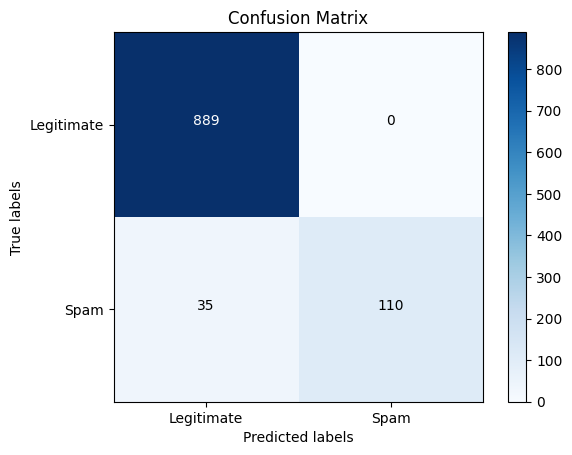

Logistic Regression Confusion Matrix:
[[884   5]
 [ 42 103]]


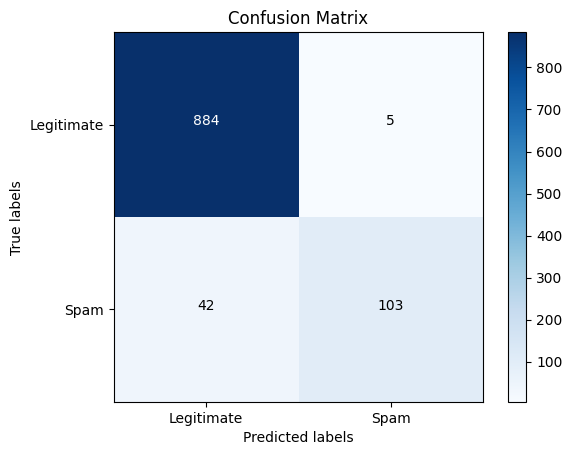

SVM Confusion Matrix:
[[889   0]
 [ 27 118]]


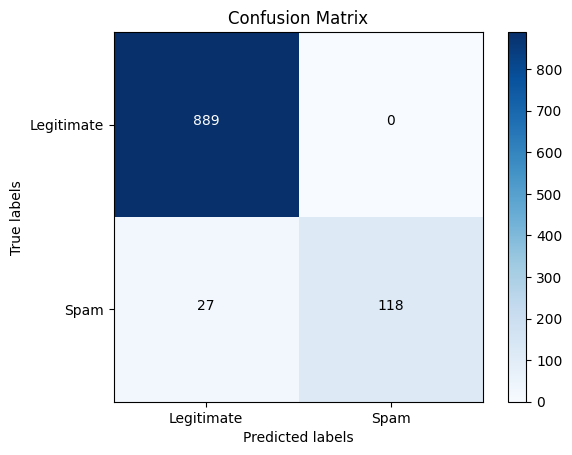

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import numpy as np

X = tfidf_vec
Y = df_train.Target
# Split data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Naive Bayes classifier using TF-IDF vectors
NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, Y_train)
NB_preds = NB_classifier.predict(X_test)
NB_accuracy = accuracy_score(Y_test, NB_preds)
print("Naive Bayes Accuracy:", NB_accuracy)
print(NB_preds)
NB_conf_matrix = confusion_matrix(Y_test, NB_preds)

# Logistic Regression classifier using TF-IDF vectors
LR_classifier = LogisticRegression(max_iter=1000)
LR_classifier.fit(X_train, Y_train)
LR_preds = LR_classifier.predict(X_test)
LR_accuracy = accuracy_score(Y_test, LR_preds)
print("Logistic Regression Accuracy:", LR_accuracy)
print(LR_preds)

LR_conf_matrix = confusion_matrix(Y_test, LR_preds)

# SVM classifier using TF-IDF vectors
SVM_classifier = SVC()
SVM_classifier.fit(X_train, Y_train)
SVM_preds = SVM_classifier.predict(X_test)
SVM_accuracy = accuracy_score(Y_test, SVM_preds)
print("SVM Accuracy:", SVM_accuracy)
print(SVM_preds)
SVM_conf_matrix = confusion_matrix(Y_test, SVM_preds)

# Function to plot confusion matrix
def confusion_matrix_plots(conf_matrix):
    plt.imshow(conf_matrix, cmap=plt.cm.Blues)
    plt.xlabel("Predicted labels")
    plt.ylabel("True labels")
    plt.xticks([0, 1], ['Legitimate', 'Spam'])
    plt.yticks([0, 1], ['Legitimate', 'Spam'])
    plt.title("Confusion Matrix")
    plt.colorbar()
    for i in range(2):
        for j in range(2):
            plt.text(j, i, str(conf_matrix[i, j]), horizontalalignment="center", color="white" if conf_matrix[i, j] > conf_matrix.max() / 2 else "black")
    plt.show()

# Plot confusion matrices
print("Naive Bayes Confusion Matrix:")
print(NB_conf_matrix)
confusion_matrix_plots(NB_conf_matrix)

print("Logistic Regression Confusion Matrix:")
print(LR_conf_matrix)
confusion_matrix_plots(LR_conf_matrix)

print("SVM Confusion Matrix:")
print(SVM_conf_matrix)
confusion_matrix_plots(SVM_conf_matrix)
